
### Business objective:
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

### Goals of data analysis:
1. Investment type analysis: 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Checkpoint 1: Data Cleaning 1
#### Load the companies and rounds data 

In [2]:
companies = pd.read_csv('companies.csv', encoding='palmos')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2 = pd.read_csv('rounds2.csv', encoding='palmos', sep=",")
rounds2 .head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


## Table 1.1: Understand the Data Set (Question)

#### How many unique companies are present in rounds2 ?

In [8]:
# How many unique companies are present in rounds2?
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
unique_count  = len(rounds2['company_permalink'].unique())
print('Unique companies in rounds2 dataset:', unique_count)

Unique companies in rounds2 dataset: 66368


#### How many unique companies are present in companies ?

In [9]:
# How many unique companies are present in companies?
companies['permalink'] = companies['permalink'].str.lower()
unique_count  = len(companies['permalink'].unique())
print('Unique companies in companies dataset:', unique_count)

Unique companies in companies dataset: 66368


#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [10]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
set_len = set(companies['permalink'].unique()).difference(set(rounds2['company_permalink'].unique()))
print(len(set_len))
True

0


True

#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?


In [11]:
master_frame = pd.merge(rounds2, companies, how='left', left_on='company_permalink', right_on='permalink')
master_frame.shape

(114949, 16)

In [12]:
# len(master_frame['permalink'].unique())
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


### Data cleaning
* Null values percentage details
* Dropping unnecessary columns
* Dropping unnecessary rows

In [13]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


####  Null values percentage details

In [14]:
null_details = pd.DataFrame(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2), columns=["Null_value_percentage"])
null_details.index.name = "Column_name"
null_details

,Null_value_percentage
Column_name,
company_permalink,0.00
funding_round_permalink,0.00
funding_round_type,0.00
funding_round_code,72.91
funded_at,0.00
raised_amount_usd,17.39
permalink,0.00
name,0.00
homepage_url,5.34


#### Drop unnecessary  columns

In [15]:
master_frame = master_frame.drop(['permalink', 'funding_round_code', 'founded_at', 'funded_at', 'state_code', 'city', 
                                  'region', 'homepage_url', 'status', 'funding_round_permalink'], axis=1)

In [16]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

Column_name
company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64

In [17]:
master_frame.head()

Column_name,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN


In [18]:
master_frame.shape

(114949, 6)

#### Drop unnecessary  columns

In [19]:
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                              master_frame['category_list'].isnull())]

In [20]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

Column_name
company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

In [21]:
master_frame.shape

(88529, 6)

In [22]:
master_frame.head()

Column_name,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
6,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN


## Checkpoint 2: Funding Type Analysis


#### 2.1 Spark Funds wants to choose following investment types for each potential investment they will make. 
* venture
* angel
* seed
* private equity

In [23]:
# Count the unique funding_round_type 
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [24]:
# Converting $ dollors to million
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

Column_name,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.00000,#fame,Media,IND
2,/organization/-qounter,seed,0.70000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.00000,0-6.com,Curated Web,CHN
6,/organization/01games-technology,undisclosed,0.04125,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,seed,0.04336,Ondine Biomedical Inc.,Biotechnology,CAN


### A plot showing the representative amount of investment in each funding type. 

In [25]:
funding_type = master_frame.pivot_table(values='raised_amount_usd', index='funding_round_type', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False).reset_index()
funding_type.head()

Column_name,funding_round_type,raised_amount_usd
0,venture,560523.362596
1,private_equity,134568.045021
2,debt_financing,111692.753486
3,post_ipo_equity,39514.081027
4,post_ipo_debt,25587.220256


In [26]:
funding_type

Column_name,funding_round_type,raised_amount_usd
0,venture,560523.362596
1,private_equity,134568.045021
2,debt_financing,111692.753486
3,post_ipo_equity,39514.081027
4,post_ipo_debt,25587.220256
5,undisclosed,21374.284568
6,seed,15774.707732
7,grant,8750.121993
8,angel,4274.925121
9,secondary_market,2364.278903


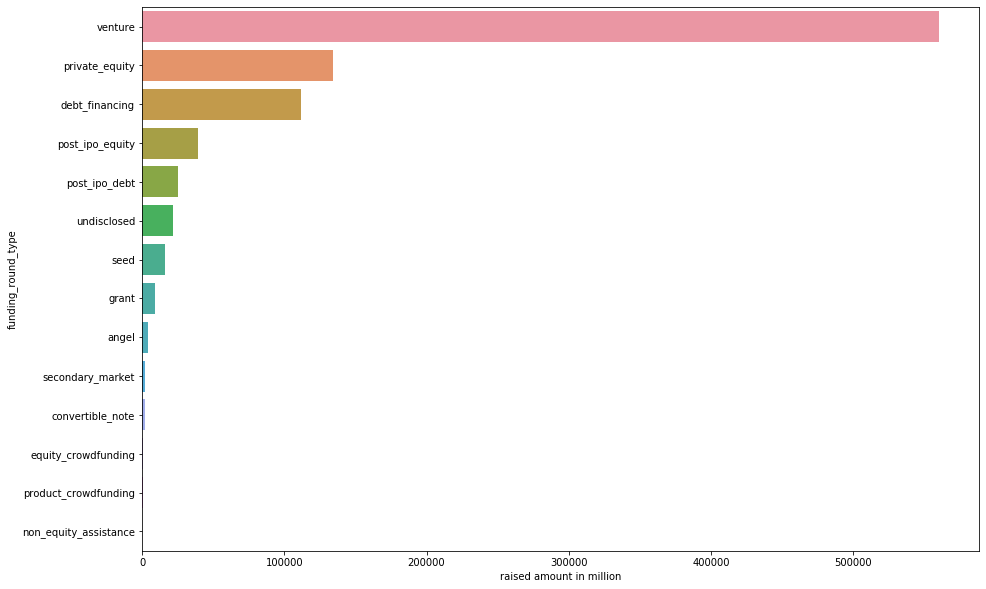

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=funding_type)
plt.xlabel('raised amount in million')
plt.savefig('FT_vs_amount.png')
plt.show()

### A plot showing the representative amount of investment for 'venture', 'angel', 'seed', 'private_equity'.

In [28]:
four_funding_type = funding_type[funding_type['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
four_funding_type.head()

Column_name,funding_round_type,raised_amount_usd
0,venture,560523.362596
1,private_equity,134568.045021
6,seed,15774.707732
8,angel,4274.925121


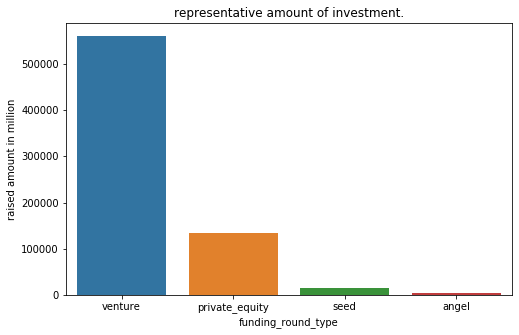

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=four_funding_type)
plt.ylabel('raised amount in million')
plt.title("representative amount of investment.")
plt.savefig('vasp_vs_amount.png')
plt.show()

In [30]:
#  Rows with only 4 investment type (funding_round_type)
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [31]:
master_frame['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [32]:
# average of FT raised_amount_usd in million
four_funding_type_avg = master_frame.pivot_table(values='raised_amount_usd', index='funding_round_type', aggfunc='mean').sort_values(by='raised_amount_usd', ascending=False).reset_index()[:4]
four_funding_type_avg.head()

Column_name,funding_round_type,raised_amount_usd
0,private_equity,73.938486
1,venture,11.724223
2,angel,0.971574
3,seed,0.747794


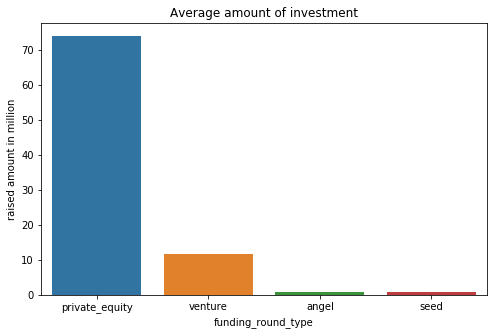

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=four_funding_type_avg)
plt.ylabel('raised amount in million')
plt.title("Average amount of investment")
plt.savefig('vasp_vs_amount_avg.png')
plt.show()

In [34]:
master_frame.head()

Column_name,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
2,/organization/-qounter,seed,0.700000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,0.043360,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN


#### 2.2 Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [35]:
# Average of each funding_round_type
round(master_frame.groupby('funding_round_type')['raised_amount_usd'].mean(), 12)

funding_round_type
angel              0.971574
private_equity    73.938486
seed               0.747794
venture           11.724223
Name: raised_amount_usd, dtype: float64

In [36]:
# Spark Funds wants to invest between 5 to 15 million USD per investment round, keep the row with venture type
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [37]:
round(master_frame.describe(), 2)

Column_name,raised_amount_usd
count,47809.00
mean,11.72
std,88.22
min,0.00
25%,1.60
50%,5.00
75%,12.00
max,17600.00


## Task 3: Country Analysis
* Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

* For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)


In [38]:
top9 = master_frame.groupby('country_code')['raised_amount_usd'].agg(
    ['sum', 'count']).rename(columns={'sum':'Total_amount', 'count':'Total_count'}).sort_values(by='Total_amount', ascending=False)[:9]
top9 = top9.reset_index()
top9


,country_code,Total_amount,Total_count
0,USA,420068.029342,35943
1,CHN,39338.918773,1548
2,GBR,20072.813004,2041
3,IND,14261.508718,819
4,CAN,9482.217668,1246
5,FRA,7226.851352,912
6,ISR,6854.350477,786
7,DEU,6306.921981,554
8,JPN,3167.647127,269


### A plot showing the top 9 countries against the total amount of investments of funding type 

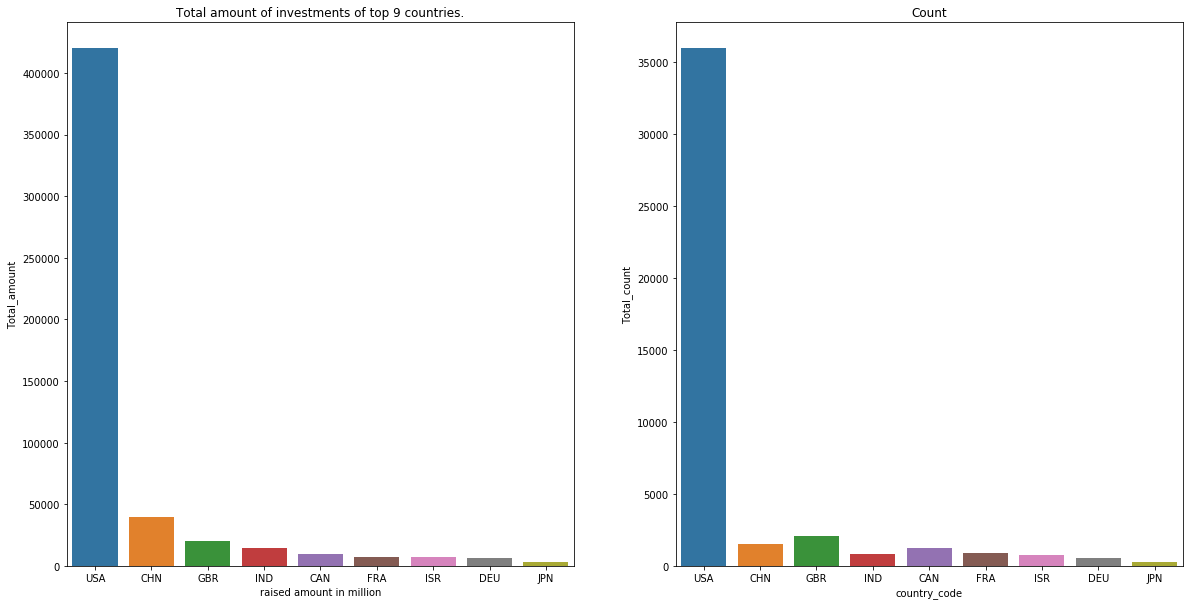

In [39]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x="country_code", y="Total_amount", data=top9, estimator=sum)
plt.title("Total amount of investments of top 9 countries.")
plt.xlabel("raised amount in million")

plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="Total_count", data=top9, estimator=sum)
plt.title("Count")
plt.savefig('top9_vs_FT.png')
plt.show()

### A plot showing the representative amount of investment in top 3 english speaking countries

In [40]:
top3_english_speaking = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english_speaking

,country_code,Total_amount,Total_count
0,USA,420068.029342,35943
2,GBR,20072.813004,2041
3,IND,14261.508718,819


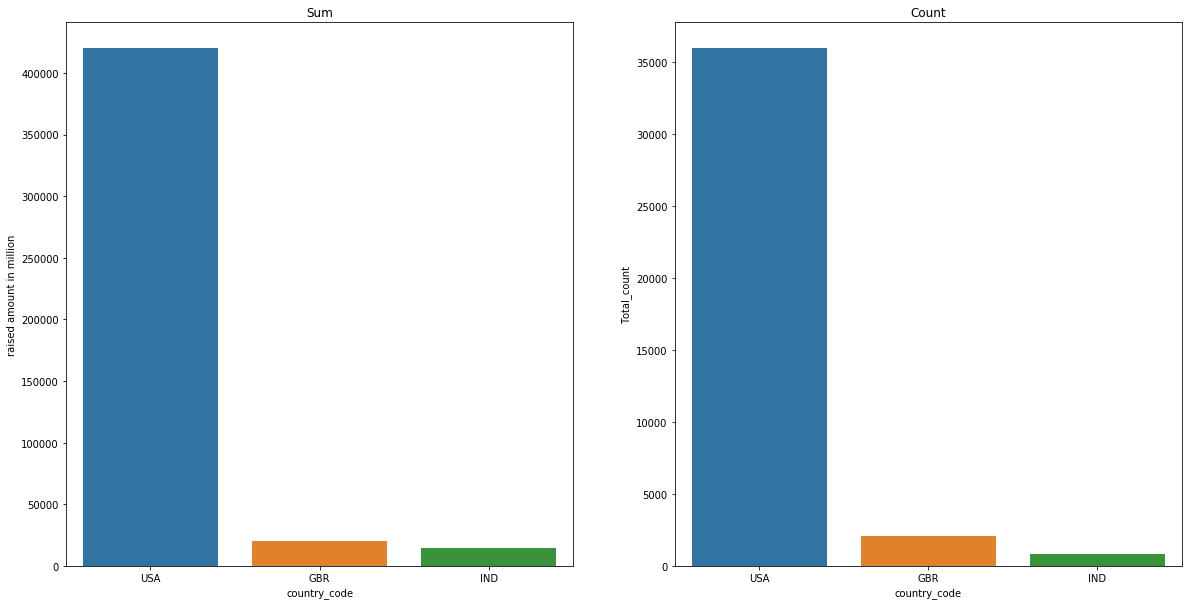

In [41]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x="country_code", y="Total_amount", data=top3_english_speaking, estimator=sum)
plt.ylabel("raised amount in million")
plt.title("Sum")

plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="Total_count", data=top3_english_speaking, estimator=sum)
plt.title("Count")
plt.savefig('top3_english_vs_amount.png')
plt.show()

In [42]:
master_frame = master_frame[(master_frame['country_code'].isin(['USA', 'GBR', 'IND']))]

In [43]:
master_frame.head()

Column_name,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
10,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps|Cable|Distribution|Software,USA


## Checkpoint 4: Sector Analysis 1

#### 4.1: Extract the primary sector of each category
Category list is a list of multiple sub-sectors separated by a pipe (vertical bar |)
##### Example
* Application Platforms|Real Time|Social Network Media.

According to the business rule the first string before the vertical bar will be considered the primary sector.

'Application Platforms' will be considered the primary sector.

In [44]:
# Extract the primary vector value
master_frame['category_list'] = master_frame['category_list'].apply(lambda x:x.split("|")[0])

In [45]:
master_frame.head()

Column_name,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
10,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps,USA


####  4.2: Map each primary sector to one of the eight main sectors

In [46]:
mapping = pd.read_csv('mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [48]:
master_frame = master_frame.merge(mapping, how = 'left', on='category_list')

In [49]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


#### Remove main_sector row which has null value

In [50]:
master_frame.isnull().sum()

company_permalink       0
funding_round_type      0
raised_amount_usd       0
name                    0
category_list           0
country_code            0
main_sector           165
dtype: int64

In [51]:
master_frame[master_frame.main_sector.isnull()].category_list.unique()

array(['Nanotechnology', 'Natural Gas Uses',
       'Natural Language Processing', 'Enterprise 2.0',
       'Adaptive Equipment', 'Racing', 'Specialty Retail',
       'Biotechnology and Semiconductor', 'Rapidly Expanding',
       'Navigation', 'Product Search', 'GreenTech', 'Retirement'],
      dtype=object)

In [52]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]
master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  0
category_list         0
country_code          0
main_sector           0
dtype: int64

In [53]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38638 entries, 0 to 38802
Data columns (total 7 columns):
company_permalink     38638 non-null object
funding_round_type    38638 non-null object
raised_amount_usd     38638 non-null float64
name                  38638 non-null object
category_list         38638 non-null object
country_code          38638 non-null object
main_sector           38638 non-null object
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


In [54]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


## Checkpoint 5: Sector Analysis 2

#### 5. 1 Create three separate data frames D1, D2 and D3 

* Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain -

    * All the columns of the master_frame along with the main sector and the primary sector.

    * Calculate the total number of investments in each main sector.

    * Total amount of investments in each main sector.

 

In [55]:
new_master_frame = master_frame[(master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15) ]

In [56]:
D1 = new_master_frame[new_master_frame['country_code'] == 'IND']
D2 = new_master_frame[new_master_frame['country_code'] == 'GBR']
D3 = new_master_frame[new_master_frame['country_code'] == 'USA']

### IND
  * Total number of investments in each main sector
  * Total amount of investments in each main sector.

In [57]:
D1_total = D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum', 'count'}).sort_values(by='sum', ascending=False)
D1_total.columns = ['Total_count', 'Total_amount']
# top 3
D1_total.head(3)

,Total_count,Total_amount
main_sector,,
Others,110,1013.409507
"Social, Finance, Analytics, Advertising",60,550.549550
"News, Search and Messaging",52,433.834545


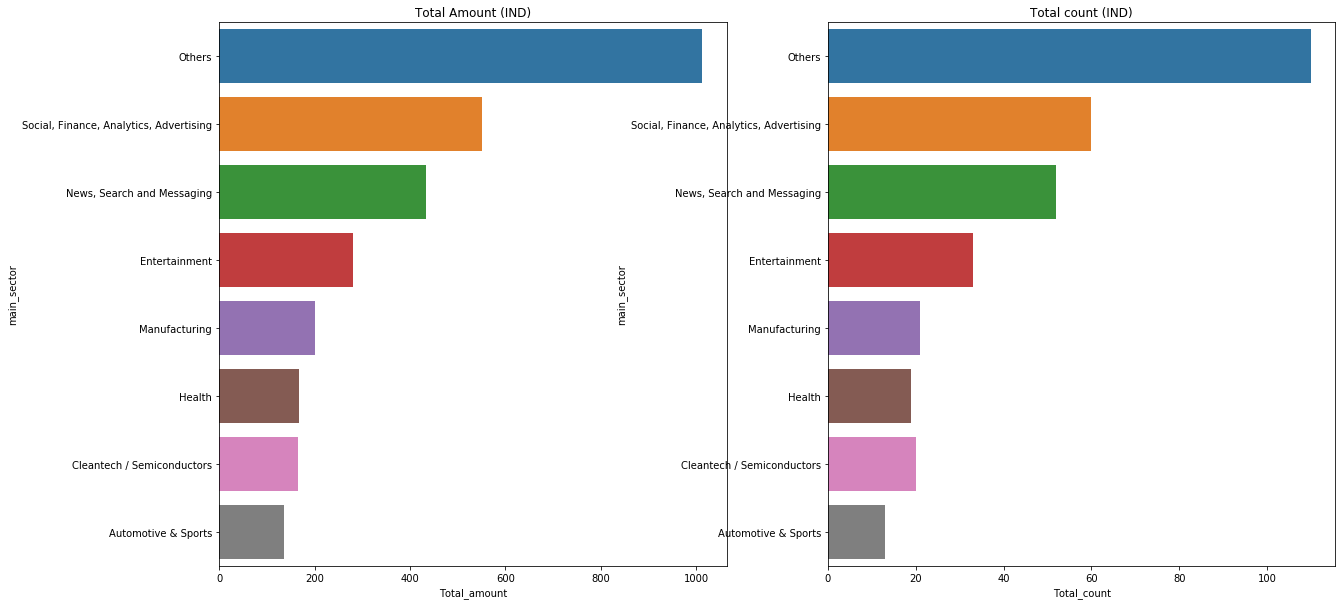

In [58]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Total Amount (IND)")
sns.barplot(y=D1_total.index, x='Total_amount', data=D1_total)

plt.subplot(1, 2, 2)
plt.title("Total count (IND)")
sns.barplot(y=D1_total.index, x='Total_count', data=D1_total)
plt.show()

### Top 3 company with the highest investment for main sector
 1. Others
 2. Social, Finance, Analytics, Advertising
 3. News, Search and Messaging	

In [59]:
top = D1[D1['main_sector'] == "Others" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39.0
/organization/myntra,38.0
/organization/commonfloor,32.9


In [60]:
top = D1[D1['main_sector'] == "Social, Finance, Analytics, Advertising" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/manthan-systems,50.7
/organization/komli-media,28.0
/organization/shopclues-com,25.0


In [61]:
top = D1[D1['main_sector'] == "News, Search and Messaging" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/gupshup-technology-india-pvt-ltd,33.0
/organization/imimobile,23.0
/organization/sms-gupshup,22.0


### GBR
  * Total number of investments in each main sector
  * Total amount of investments in each main sector.

In [62]:
D2_total = D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'}).sort_values(by='sum', ascending=False)
D2_total.columns = ['Total_count', 'Total_amount']
# top 3
D2_total.head(3)

,Total_count,Total_amount
main_sector,,
Others,147,1283.624289
Cleantech / Semiconductors,128,1150.139665
"Social, Finance, Analytics, Advertising",133,1089.404014


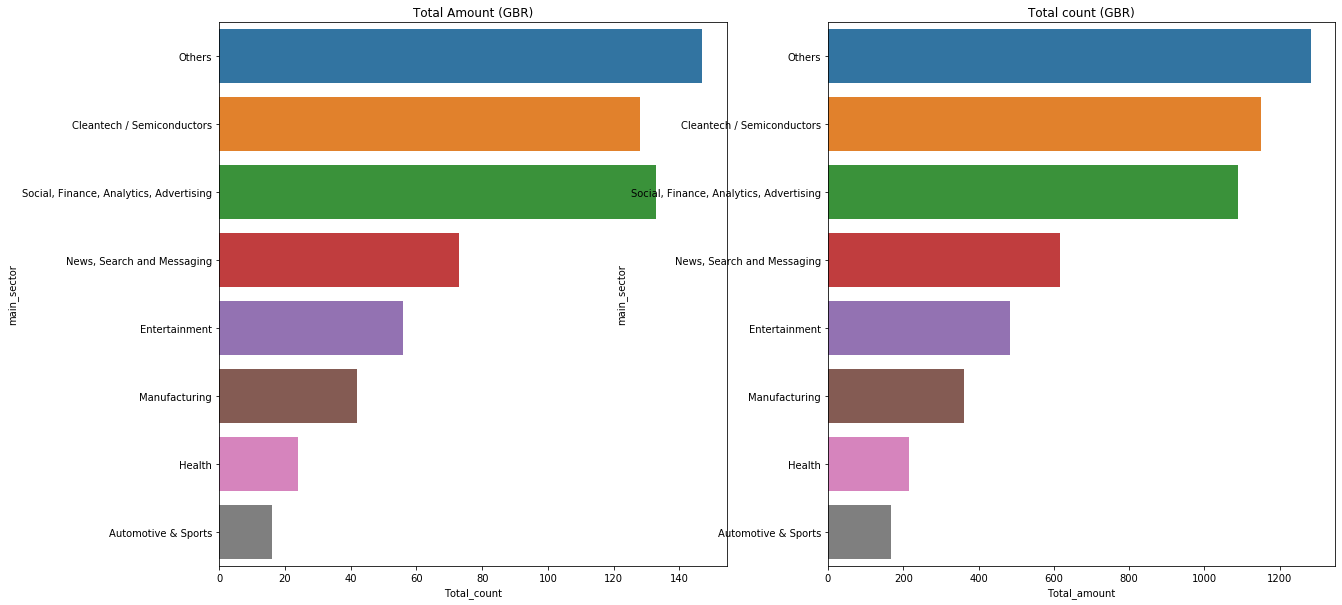

In [63]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Total Amount (GBR)")
sns.barplot(y=D2_total.index, x='Total_count', data=D2_total)

plt.subplot(1, 2, 2)
plt.title("Total count (GBR)")
sns.barplot(y=D2_total.index, x='Total_amount', data=D2_total)
plt.show()

### Top 3 company with the highest investment for main sector
 1. Others
 2. Cleantech / Semiconductors
 3. Social, Finance, Analytics, Advertising

In [64]:
top = D2[D2['main_sector'] == "Others" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37.00
/organization/sensage,36.25
/organization/enigmatic,32.50


In [65]:
top = D2[D2['main_sector'] == "Cleantech / Semiconductors" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/eusa-pharma,35.600000
/organization/horizon-discovery,31.353719
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h,29.132906


In [66]:
top = D2[D2['main_sector'] == "Social, Finance, Analytics, Advertising" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37.5
/organization/mythings,34.0
/organization/zopa,32.9


### USA
  * Total number of investments in each main sector
  * Total amount of investments in each main sector.

In [67]:
D3_total = D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'}).sort_values(by='sum', ascending=False)
D3_total.columns = ['Total_count', 'Total_amount']
# top 3
D3_total.head(3)

,Total_count,Total_amount
main_sector,,
Others,2950,26321.007002
"Social, Finance, Analytics, Advertising",2714,23807.376964
Cleantech / Semiconductors,2300,21206.628192


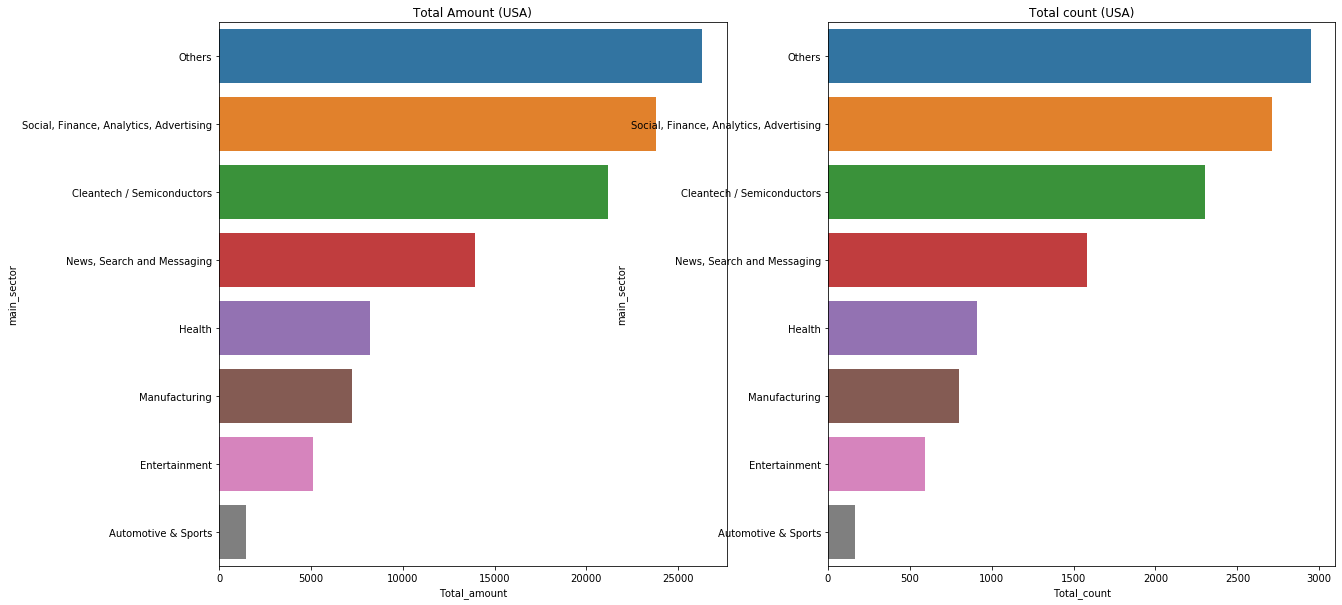

In [68]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Total Amount (USA)")
sns.barplot(y=D3_total.index, x='Total_amount', data=D3_total)

plt.subplot(1, 2, 2)
plt.title("Total count (USA)")
sns.barplot(y=D3_total.index, x='Total_count', data=D3_total)
plt.show()

### Top 3 company with the highest investment for main sector
 1. Others
 2. Social, Finance, Analytics, Advertising
 3. Cleantech / Semiconductors

In [69]:
top = D3[D3['main_sector'] == "Others" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/virtustream,64.300000
/organization/capella,54.968051
/organization/airtight-networks,54.201907


In [70]:
top = D3[D3['main_sector'] == "Social, Finance, Analytics, Advertising" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/shotspotter,67.933006
/organization/demandbase,63.000000
/organization/intacct,61.800000


In [71]:
top = D3[D3['main_sector'] == "Cleantech / Semiconductors" ]
top_company = top.pivot_table(values='raised_amount_usd', index='company_permalink', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)
top_company.head(3)

,raised_amount_usd
company_permalink,
/organization/biodesix,75.300000
/organization/tigo-energy,68.739496
/organization/forsight-labs,61.300001


####  5.2: Sector-wise Investment Analysis

In [72]:
#Total number of investments (count)
print("IND investments count", D1_total.Total_amount.sum())
print("GBR investments count", D2_total.Total_amount.sum())
print("USA investments count", D3_total.Total_amount.sum())

IND investments count 2949.5436019999997
GBR investments count 5365.228300000001
USA investments count 107318.29466399997


In [73]:
#Total number of investments (count)
print("IND investments amount", round(D1_total.Total_count.sum(), 12))
print("GBR investments amount", round(D2_total.Total_count.sum(), 12))
print("USA investments amount", round(D3_total.Total_count.sum(), 12))

IND investments amount 328
GBR investments amount 619
USA investments amount 12012


### A plot showing the number of investments in the top 3 sectors of the top 3 countries
   1. This plot display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [74]:
company_all = new_master_frame.pivot_table(values='raised_amount_usd', index=['main_sector', 'country_code'], aggfunc=['sum', 'count'])
company_all.reset_index(inplace=True)
company_all.columns = ['main_sector', 'country_code', 'Total_amount', 'Total_count']
company_all.head()

,main_sector,country_code,Total_amount,Total_count
0,Automotive & Sports,GBR,167.051565,16
1,Automotive & Sports,IND,136.900000,13
2,Automotive & Sports,USA,1454.104361,167
3,Cleantech / Semiconductors,GBR,1150.139665,128
4,Cleantech / Semiconductors,IND,165.380000,20


### Top 3 sector country wise

In [75]:
ind = company_all[company_all['country_code']=='IND'].sort_values(by=['Total_amount'], ascending=False)
gbr = company_all[company_all['country_code']=='GBR'].sort_values(by=['Total_amount'], ascending=False)
usa = company_all[company_all['country_code']=='USA'].sort_values(by=['Total_amount'], ascending=False)

In [76]:
top_3_country_sector = [usa[:3], gbr[:3], ind[:3]]
result = pd.concat(top_3_country_sector)
result

,main_sector,country_code,Total_amount,Total_count
20,Others,USA,26321.007002,2950
23,"Social, Finance, Analytics, Advertising",USA,23807.376964,2714
5,Cleantech / Semiconductors,USA,21206.628192,2300
18,Others,GBR,1283.624289,147
3,Cleantech / Semiconductors,GBR,1150.139665,128
21,"Social, Finance, Analytics, Advertising",GBR,1089.404014,133
19,Others,IND,1013.409507,110
22,"Social, Finance, Analytics, Advertising",IND,550.549550,60
16,"News, Search and Messaging",IND,433.834545,52


#### Top 3 sectors of the top 3 countries 

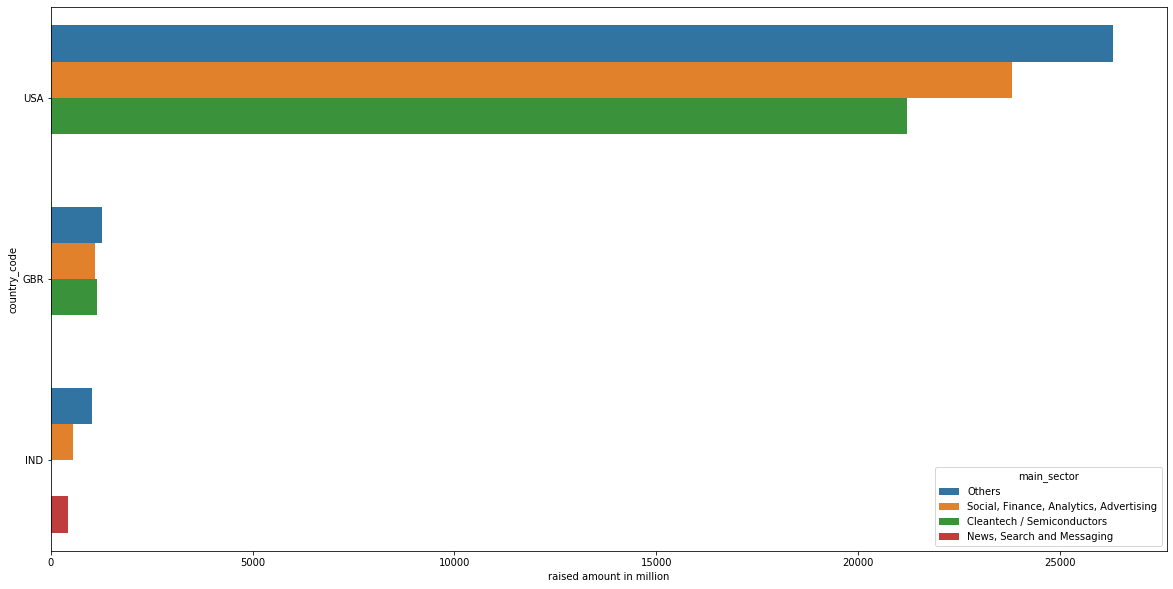

In [77]:
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='Total_amount', hue="main_sector", data=result, estimator=np.sum)
plt.xlabel("raised amount in million")
plt.savefig('top3sector_vs_top3count.png')
plt.show()

In [78]:
all_country_sector = [usa, gbr, ind]
all_result = pd.concat(all_country_sector)
all_result.head()

,main_sector,country_code,Total_amount,Total_count
20,Others,USA,26321.007002,2950
23,"Social, Finance, Analytics, Advertising",USA,23807.376964,2714
5,Cleantech / Semiconductors,USA,21206.628192,2300
17,"News, Search and Messaging",USA,13959.567428,1582
11,Health,USA,8211.859357,909


#### All sectors of the top 3 countries 

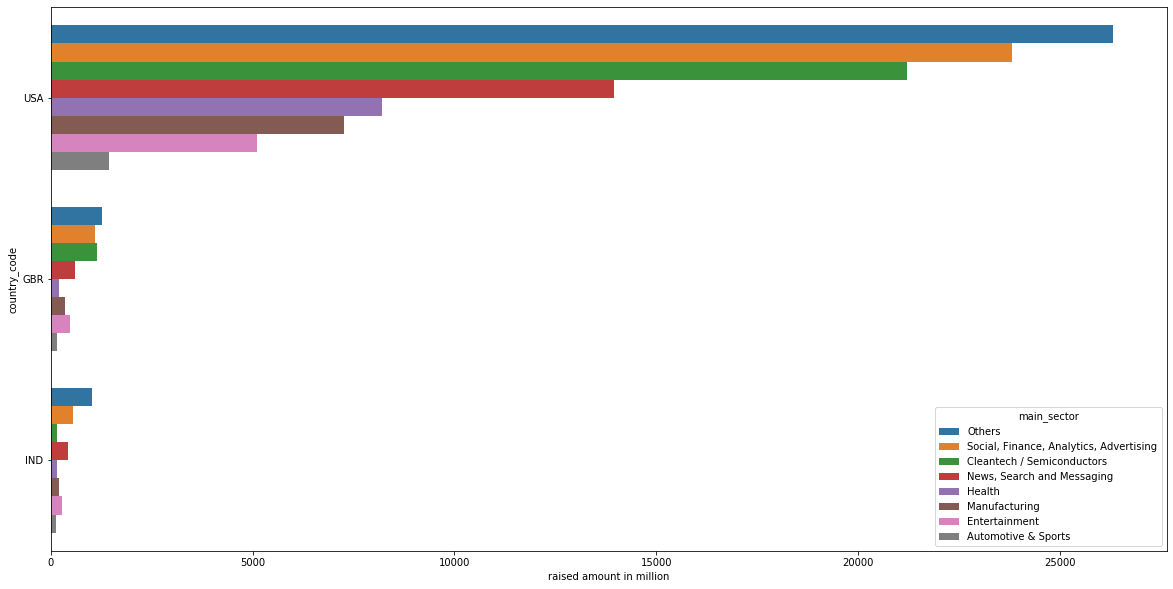

In [79]:
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='Total_amount', hue="main_sector", data=all_result)
plt.xlabel("raised amount in million")
plt.savefig('allsector_vs_top3count.png')
plt.show()